### Collecting images for face recognition

In [4]:
import cv2
import numpy as np

# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default-Copy1.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = './Images/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 50: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = './Dataset_Face_Recognition/Train/'
valid_path = './Dataset_Face_Recognition/Test/'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of classes
folders = glob('./Dataset_Face_Recognition/Train/*')

In [7]:
len(folders)

6

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./Dataset_Face_Recognition/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('./Dataset_Face_Recognition/Test/',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

Found 199 images belonging to 6 classes.
Found 134 images belonging to 6 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [13]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 14 steps
Epoch 1/5
20/20 [==============================] - 63s 3s/step - loss: 1.7759 - accuracy: 0.4724 - val_loss: 1.0081 - val_accuracy: 0.7313
Epoch 2/5
20/20 [==============================] - 70s 4s/step - loss: 0.6083 - accuracy: 0.7889 - val_loss: 0.3979 - val_accuracy: 0.8433
Epoch 3/5
20/20 [==============================] - 72s 4s/step - loss: 0.1948 - accuracy: 0.9397 - val_loss: 0.3720 - val_accuracy: 0.8731
Epoch 4/5
20/20 [==============================] - 72s 4s/step - loss: 0.1636 - accuracy: 0.9598 - val_loss: 0.2928 - val_accuracy: 0.9030
Epoch 5/5
20/20 [==============================] - 72s 4s/step - loss: 0.1121 - accuracy: 0.9799 - val_loss: 0.3067 - val_accuracy: 0.8731


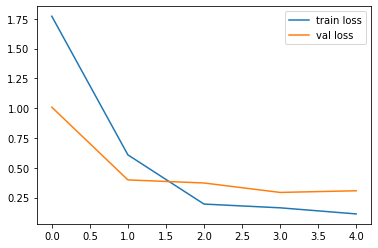

<Figure size 432x288 with 0 Axes>

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

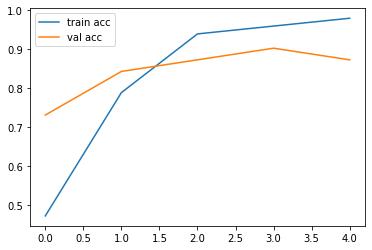

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
 import tensorflow as tf

from tensorflow.keras.models import load_model

model.save('facerecognition_Vgg16.h5')

### Now using OpenCv --> Face Recognition through Web Cam

In [17]:
# Face Recognition

# Importing the libraries
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from tensorflow.keras.models import load_model
import numpy as np

from tensorflow.keras.preprocessing import image
model = load_model('facerecognition_Vgg16.h5')

# Loading the cascades
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default-Copy1.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)
                     
        name="None matching"
        
        if(pred[0][0]>0.5):
            name='Chris Evan'
        if(pred[0][1]>0.5):
            name='Chris Hemsworth'
        if(pred[0][2]>0.5):
            name='Dhyey '
        if(pred[0][3]>0.5):
            name='Mark'
        if(pred[0][4]>0.5):
            name='Robert Jr'
        if(pred[0][5]>0.5):
            name='Scarlett'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

[[1.6490626e-13 1.0000000e+00 4.5238703e-32 0.0000000e+00 7.3814121e-10
  0.0000000e+00]]
[[1.3226303e-20 1.0000000e+00 9.0276051e-37 0.0000000e+00 9.8565904e-13
  5.9743727e-38]]
[[1.3538949e-16 1.0000000e+00 2.3772936e-38 8.5486820e-33 1.4190162e-12
  0.0000000e+00]]
[[3.4673095e-20 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.9537706e-16
  0.0000000e+00]]
[[7.9737129e-20 1.0000000e+00 2.5951572e-31 0.0000000e+00 2.3458633e-15
  1.6892370e-37]]
[[4.3023247e-16 1.0000000e+00 1.7568329e-34 0.0000000e+00 2.2397515e-17
  0.0000000e+00]]
[[3.4835047e-12 1.0000000e+00 8.5513500e-27 9.9411881e-33 5.3441295e-15
  0.0000000e+00]]
[[1.994716e-16 1.000000e+00 0.000000e+00 0.000000e+00 8.825601e-14
  0.000000e+00]]
[[5.0400214e-12 1.0000000e+00 6.9752156e-31 0.0000000e+00 4.7880168e-15
  0.0000000e+00]]
[[8.6395637e-13 1.0000000e+00 3.4546157e-31 1.8620298e-35 2.7075566e-14
  0.0000000e+00]]
[[7.911044e-12 1.000000e+00 1.203053e-33 4.646870e-30 1.830639e-20
  0.000000e+00]]
[[5.315086e-19 1.00000

[[6.9495845e-16 9.9276298e-01 1.6885838e-17 4.9518828e-18 7.2370521e-03
  1.4109773e-25]]
[[2.4403522e-21 1.6148797e-06 1.2046078e-18 5.1651338e-24 9.9999833e-01
  1.0074106e-23]]
[[2.3025366e-22 3.7307882e-12 5.3025144e-25 9.1605950e-25 1.0000000e+00
  1.0105742e-27]]
[[1.4330373e-12 5.4578213e-12 1.0525595e-28 1.9837756e-29 1.0000000e+00
  1.0326490e-30]]
[[9.1834309e-20 9.6116858e-11 4.7977511e-27 2.3317698e-20 1.0000000e+00
  5.3578865e-23]]
[[1.5561865e-14 7.2292528e-12 1.2126358e-27 3.5874865e-20 1.0000000e+00
  1.6184546e-23]]
[[0.0000000e+00 1.5485377e-19 0.0000000e+00 3.8130900e-30 1.0000000e+00
  0.0000000e+00]]
[[1.2103187e-13 1.9475361e-02 1.0003812e-18 9.1459211e-29 9.8052466e-01
  8.2653262e-30]]
[[0.0000000e+00 8.3407061e-21 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.2706065e-15]]
[[1.2179164e-08 4.4775244e-02 5.1363392e-20 3.9460611e-21 9.5522475e-01
  2.4623696e-17]]
[[2.1132479e-32 9.4379597e-05 0.0000000e+00 0.0000000e+00 9.9990559e-01
  8.4285745e-10]]
[[0.000000

[[1.6857721e-24 1.7127223e-11 9.6050685e-30 1.5700712e-25 1.0000000e+00
  2.4080125e-33]]
[[2.9558309e-12 8.3272809e-08 4.8147247e-21 7.2387629e-22 9.9999988e-01
  1.4944453e-32]]
[[3.6131004e-20 1.4572121e-09 1.8300339e-25 4.4560317e-23 1.0000000e+00
  1.4240841e-34]]
[[5.0905282e-35 3.2158447e-24 0.0000000e+00 0.0000000e+00 1.0000000e+00
  3.2595653e-32]]
[[3.1853748e-21 6.8958464e-08 3.1988149e-23 2.4189461e-21 9.9999988e-01
  1.2267903e-33]]
[[4.6036096e-24 2.2007043e-04 3.2568673e-20 5.6584380e-15 9.9978000e-01
  2.3292028e-28]]
[[2.6343799e-16 2.3130236e-04 1.6212939e-22 1.7138370e-17 9.9976867e-01
  2.0310137e-31]]
[[6.0475939e-03 8.5511992e-06 3.2453805e-16 8.4400821e-19 9.9394387e-01
  9.9300094e-22]]
[[2.3519454e-14 1.0250745e-04 7.1815212e-17 7.1968247e-17 9.9989748e-01
  6.3064295e-20]]
[[4.5296948e-12 1.4413785e-06 7.8200686e-21 2.4569443e-19 9.9999857e-01
  7.7936075e-25]]
[[1.8413599e-11 9.9942613e-01 1.4526834e-20 6.7252050e-16 5.7395740e-04
  1.2171048e-21]]
[[1.997740

[[0.0000000e+00 6.9138497e-12 0.0000000e+00 6.3467644e-32 1.0000000e+00
  0.0000000e+00]]
[[8.3746295e-03 6.5055164e-04 4.4638413e-33 1.3595278e-16 9.9097484e-01
  4.9694640e-28]]
[[0.0000000e+00 1.8581476e-36 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00]]
[[0.0000000e+00 3.8006834e-10 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00]]
[[0.0000000e+00 4.7065794e-07 0.0000000e+00 0.0000000e+00 9.9999952e-01
  0.0000000e+00]]
[[0.         0.8386699  0.         0.         0.16133003 0.        ]]
[[0.         0.9978981  0.         0.         0.00210188 0.        ]]
[[0.0000000e+00 9.9999976e-01 0.0000000e+00 0.0000000e+00 2.1061258e-07
  0.0000000e+00]]
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 3.1706044e-09
  0.0000000e+00]]
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 4.9299733e-14
  0.0000000e+00]]
[[0.0000000e+00 9.9999833e-01 0.0000000e+00 0.0000000e+00 1.6362186e-06
  0.0000000e+00]]
[[0.0000000e+00 1.3219585e-10 0.0000000e+00 0.0000

[[0.0000000e+00 5.2045303e-04 0.0000000e+00 1.8480517e-34 9.9947959e-01
  0.0000000e+00]]
[[0.0000000e+00 9.9994040e-01 0.0000000e+00 0.0000000e+00 5.9574984e-05
  0.0000000e+00]]
[[0.00000000e+00 9.99991536e-01 0.00000000e+00 1.24409435e-26
  8.44442638e-06 0.00000000e+00]]
[[0.00000000e+00 9.98257339e-01 0.00000000e+00 1.05545775e-35
  1.74266845e-03 0.00000000e+00]]
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.4680476e-37 5.7372304e-08
  0.0000000e+00]]
[[0.0000000e+00 9.9999917e-01 0.0000000e+00 0.0000000e+00 8.4553665e-07
  0.0000000e+00]]
[[0.000000e+00 4.648671e-04 0.000000e+00 0.000000e+00 9.995352e-01
  0.000000e+00]]
[[0.0000000e+00 9.9960726e-01 0.0000000e+00 0.0000000e+00 3.9279147e-04
  0.0000000e+00]]
[[0.0000000e+00 9.9997377e-01 0.0000000e+00 1.9566595e-37 2.6199359e-05
  0.0000000e+00]]
[[0.000000e+00 9.999994e-01 0.000000e+00 0.000000e+00 5.999838e-07
  0.000000e+00]]
[[0.0000000e+00 9.9999297e-01 0.0000000e+00 0.0000000e+00 7.0861670e-06
  0.0000000e+00]]
[[0.      